In [1]:
import random

# BMI를 계산해서 레이블을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"

# 출력 파일 준비하기
fp = open("bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\r\n")

# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    # Below code makes line like -> h, w, label(linebreak)
    fp.write("{0},{1},{2}\r\n".format(h, w, label))

fp.close()
print("ok,", cnt)

ok, {'thin': 6258, 'normal': 6012, 'fat': 7730}


In [13]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 키와 몸무게 데이터 읽어 들이기 --- (※1)
tbl = pd.read_csv("bmi.csv")

# 칼럼(열)을 자르고 정규화하기 --- (※2)
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정
""" 값을 0~1로 만드는 중. 그래서 최대값을 가정. (z 정규화와는 다름) """
wh = pd.concat([w, h], axis=1)

# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(wh, label)

# 데이터 학습하기 --- (※4)
clf = svm.SVC()
clf.fit(data_train, label_train)

# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)

# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9972
리포트 =
               precision    recall  f1-score   support

         fat       1.00      0.99      1.00      1953
      normal       0.99      1.00      1.00      1474
        thin       1.00      1.00      1.00      1573

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



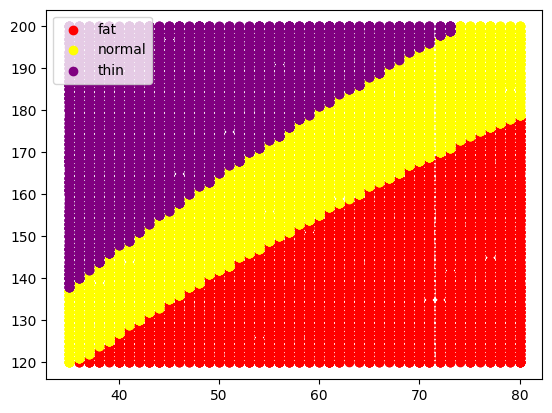

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("bmi.csv", index_col=2)

# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)

scatter("fat",    "red")
scatter("normal", "yellow")
scatter("thin",   "purple")

ax.legend()
plt.savefig("bmi-test.png")
plt.show()